In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns



In [2]:
diamonds = pd.read_csv('./diamonds.csv')
crickets = pd.read_csv('./Cricket_chirps.csv')

In [3]:
crickets.head()
#chirps per second 
#X temperatire in 

X   Y
0  88.599998  19
1  71.599998  16
2  93.300003  22
3  84.300003  17
4  80.599998  19

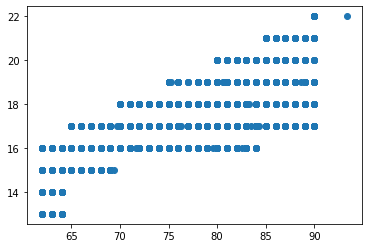

In [4]:
X = crickets['X']
y = crickets['Y']

plt.scatter(X,y)

In [5]:
crickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1499 non-null   float64
 1   Y       1499 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.5 KB


In [6]:
crickets.corr()

X         Y
X  1.000000  0.729448
Y  0.729448  1.000000

In [7]:
X_with_constant = sm.add_constant(X)
simple_model = sm.OLS(endog = y, exog = X_with_constant).fit()
predictions = simple_model.predict(X_with_constant)
residuals = y - predictions
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1702.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.67e-249
Time:                        13:46:32   Log-Likelihood:                -2437.7
No. Observations:                1499   AIC:                             4879.
Df Residuals:                    1497   BIC:                             4890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.293     17.868      0.000       4.662       5.812
X              0.1580      0.004     41.260      0.000       0.150       0.165
==============================================================================
Omnibus:                      182.645   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.608
Skew:                          -0.066   Prob(JB):                     1.69e-11
Kurtosis:                       2.119   Cond. No.                         706.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumption #1: Linearity

The first assumption of simple linear regression is that there is a linear relationship between the independent and dependent variable. This assumption is important because, in order for our regression to be useful, we need a linear relationship. The easiest way to test this assumption is plotting your dependent and independent variable. If, the plot looks as though it follows a line, then it passes the linearity test and linear regression is a great model to show the relationship between the variables.

Below is a good example of linearity assumption being met

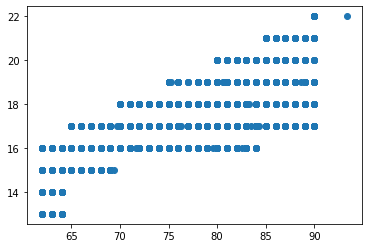

In [8]:
plt.scatter(X,y)

This is an example of our linearity assumption failing. The relationship between price and depth is not linear.

## Assumption 2: Normality

In linear regression, we want our errors to be normally distributed
this function prints a histogram of the residuals, idealy this histogram should be normally distributed

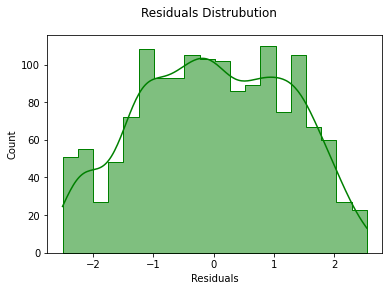

In [9]:
fig, ax = plt.subplots()
sns.histplot(residuals, bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Residuals")
fig.suptitle("Residuals Distrubution");

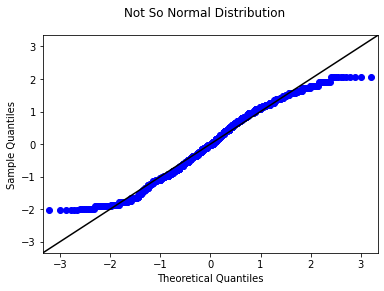

In [10]:
fig, ax = plt.subplots()
sm.graphics.qqplot(simple_model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

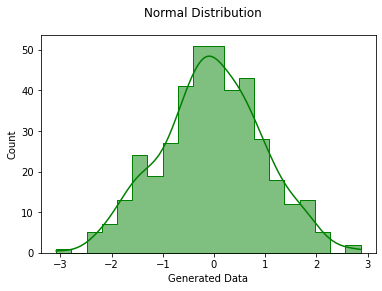

In [11]:
# CREATING NORMAL DATA 
generated_data = stats.norm.rvs(size=400, random_state=7)
fig, ax = plt.subplots()
sns.histplot(generated_data, bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Generated Data")
fig.suptitle("Normal Distribution");

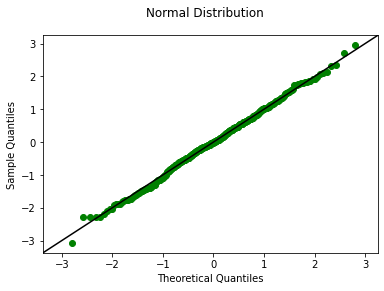

In [12]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(generated_data, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

In [13]:
from statsmodels.stats.stattools import jarque_bera

In [14]:
jarque_bera(generated_data)

(0.4519188967633713,
 0.7977504510815616,
 -0.0332236549490571,
 2.849335177253925)

In [15]:
jarque_bera(simple_model.resid)

(49.607787480629064,
 1.6896852730369103e-11,
 -0.06620425395070195,
 2.118681618562089)

The four values returned are:

1. $\text{JB}$ test statistic
2. The p-value for $\text{JB}$
3. Skew
4. Kurtosis

You can also view these values directly within a model summary. For example, these are the results for our auto MPG model. If you look in the lower right area you will see `Jarque-Bera (JB)` and `Prob(JB)`:

In [16]:
print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1702.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.67e-249
Time:                        13:46:33   Log-Likelihood:                -2437.7
No. Observations:                1499   AIC:                             4879.
Df Residuals:                    1497   BIC:                             4890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.293     17.868      0.0

### Interpreting Jarque-Bera Test Results

In the case of the Jarque-Bera test the **null hypothesis is that the distribution is normal**. A sufficiently low p-value means we reject the null hypothesis, i.e. that the distribution is not normal.

For the two datasets presented above:

* The generated data's **p-value is about 0.8**. This is much higher than the standard alpha of 0.05, so we fail to reject the null hypothesis and can **consider the distribution to be normal**
* The model residuals' **p-value is about 0.000000000007**. This is much lower than the standard alpha of 0.05, so we reject the null hypothesis and **do not consider the distribution to be normal**

Like with some other model assumption checks, this is "opposite" of the p-values you want for model significance or coefficient significance. A low p-value in the Jarque-Bera test is a "bad" outcome, indicating a problem with the model.

## Assumption 3 : Homoskedasticity

In linear regression, we want the variance of our error terms to be constant

Text(0.5, 0.98, 'Residuals Vs. Predictions')

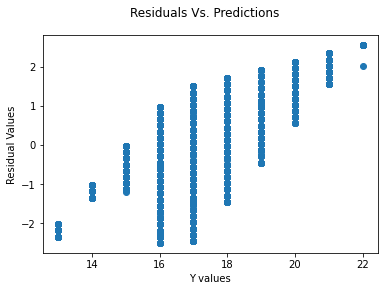

In [17]:
fig, ax = plt.subplots()
ax.scatter(y, residuals)
ax.set_xlabel('Y values')
ax.set_ylabel('Residual Values')
plt.suptitle('Residuals Vs. Predictions')


## Assumption 4: Independence

We want to make sure that there is no correlation between observations of our sample. This is not something that can be deduced by looking at the data, it is more about the collection of the data. We do NOT want dependent observations.

For this last assumption, we want to make sure our residuals are independent. When this assumption is violated, the standard errors of the coefficients in a regression model are likely to be underestimated which means predictor variables are more likely to be deemed statistically significant when theyâ€™re actually not.
One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression.

The Durbin-Watson test uses the following hypotheses:

H0 (null hypothesis): There is no correlation among the residuals.

HA (alternative hypothesis): The residuals are autocorrelated.

The test statistic always ranges from 0 to 4 where:

d = 2 indicates no autocorrelation
d < 2 indicates positive serial correlation
d > 2 indicates negative serial correlation

In general, if d is less than 1.5 or greater than 2.5 then there is potentially a serious autocorrelation problem. Otherwise, if d is between 1.5 and 2.5 then autocorrelation is likely not a cause for concern.

To determine if a Durbin-Watson test statistic is significantly significant at a certain alpha level, you can refer to this table of critical values.

If the absolute value of the Durbin-Watson test statistic is greater than the value found in the table, then you can reject the null hypothesis of the test and conclude that  autocorrelation is present.

In [20]:
dw = sm.stats.stattools.durbin_watson
dw(residuals)

1.962232159579161